# Event "Run Up" Analysis

## Introduction:
In biotech investing, people often discuss what is called a 'run up'. This is when, during the period leading up to a catalyst event, there is an increase in either volatility or share price. This is for a couple reasons but many would describe it as the market pricing in the correct probability of event outcome and representing this in the share price before the event. The ability to trade this 'run up' is a coveted one in biotech investing; it allows an investor to profit on the increased share price but then close the position before the data actually readouts. This removes the risk of the binary event outcome but still allows the investor to profit on the event. The goal of this project was to determine the occurence of events that have 
a 'run up', how much these events often 'run up', and the optimal entry and exit date relative to the event date to maximize alpha by playing the 'run up'. The optimal days to trade a 'run up' event is useful because it could help inform investment decisions. 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from yahoofinancials import YahooFinancials as yf

In [2]:
data = pd.read_csv('catalystData.csv')

In [ ]:
data = data.drop('Unnamed: 0',axis=1)

In [36]:
data = data.drop('Day',axis=1)

In [37]:
data.head()

,Ticker,Drug,Indication,Date,Status,Class
0,AGRX,Twirla,Contraceptive patch,2017-01-03,Phase3,neg
1,AEZS,Macimorelin Acetate - Macrilen,Adult Growth Deficiency,2017-01-04,Phase3,neg
2,HALO,HALO-301,Pancreatic cancer,2017-01-05,Phase2,pos
3,GNCA,GEN-003,Genital herpes,2017-01-05,Phase2b,na
4,OTIC,OTIPRIO,Acute otitis externa,2017-01-05,Phase3,na


In [38]:
data['Date'] = pd.to_datetime(data['Date'])

In [18]:
def stock_data(alist, date1, date2): #function to generate adj close price data for tickers in alist
    yf_tickers = yf(alist)
    res = yf_tickers.get_historical_price_data(date1, date2,'daily') # this spits json
    res_df = pd.DataFrame({
    a: {x['formatted_date']: x['adjclose'] for x in res[a]['prices']} for a in alist}).round(decimals=2) # formats json into pd df with adj close data, date as index, ticker as columns
    return res_df

In [16]:
uniqueTickers = data['Ticker'].unique().tolist()

uniqueTickers = uniqueTickers + ['XBI']

date1 = '2016-01-01'
date2 = '2020-12-29'

In [19]:
priceData = stock_data(uniqueTickers,date1,date2)

In [21]:
priceData.index = pd.to_datetime(priceData.index) #reformats the price data array to have datetime format index
priceData['Day'] = [a for a in range(len(priceData.index))] #adds Day count column for use as second index
priceData.head()

,AGRX,AEZS,HALO,GNCA,OTIC,CHRS,GSK,FGEN,NBIX,ABBV,...,CALT,VYGR,PRAX,MRNA,RAPT,BCLI,HEPA,QURE,XBI,Day
2016-01-04,9.45,4.40,16.64,40.88,26.03,21.07,31.33,30.50,52.35,45.52,...,NaN,21.15,NaN,NaN,NaN,2.95,873.6,15.81,67.17,0
2016-01-05,8.94,4.21,16.39,40.64,24.40,20.59,31.51,30.07,52.43,45.33,...,NaN,20.44,NaN,NaN,NaN,3.09,840.0,16.17,66.56,1
2016-01-06,8.30,3.64,15.77,37.52,21.05,18.87,31.17,27.07,50.12,45.34,...,NaN,20.95,NaN,NaN,NaN,3.00,778.4,14.91,63.72,2
2016-01-07,7.95,3.29,15.00,34.88,21.09,18.28,30.21,27.07,47.74,45.21,...,NaN,18.91,NaN,NaN,NaN,2.91,728.0,17.28,61.22,3
2016-01-08,8.15,3.29,14.85,33.04,20.16,18.27,30.53,26.00,46.41,43.97,...,NaN,18.83,NaN,NaN,NaN,3.08,649.6,18.19,59.92,4


In [40]:
def fixDates(dates_list):
    df= priceData #specifies which dataframe to look in to check each date 
    res = []
    for date in dates_list: #for each date in the list
        n=0 #sets the number of loops (n) as zero
        while n<4: #while less than four loops have been performed
            try: 
                df.loc[date] #checks if the date can be loc in the dataframe
                res.append(date)#appends if successful
                n += 5 #this ends the loop by adding 5 to n, this is arbitrary and can be anything more than 4
            except KeyError: #the error handling for when the date is not in the dataframe
                n += 1 #sets the number of loops run to 1 more than it was
                date += timedelta(days=1) #adds one day to the datetime date 
        if n == 4: #this is when four loops have occured, different from when loc successful as 4 can only be produced by 4 loops and success renders 5. 
            res.append(np.nan) #if after 4 loops a date cannot be found it returns NaT, this can then be removed from dataframe. 
    return res

In [44]:
fixedDates = fixDates(data['Date'].to_list())
data['Date'] = fixedDates
data['Day'] = priceData.loc[data['Date'],'Day'].to_list() #finds the Day count corresponding to each datetime in the dataframe based on the price array datetimes and day counts

In [45]:
data.head()

,Ticker,Drug,Indication,Date,Status,Class,Day
0,AGRX,Twirla,Contraceptive patch,2017-01-03,Phase3,neg,252
1,AEZS,Macimorelin Acetate - Macrilen,Adult Growth Deficiency,2017-01-04,Phase3,neg,253
2,HALO,HALO-301,Pancreatic cancer,2017-01-05,Phase2,pos,254
3,GNCA,GEN-003,Genital herpes,2017-01-05,Phase2b,na,254
4,OTIC,OTIPRIO,Acute otitis externa,2017-01-05,Phase3,na,254


In [74]:
data.shape

(2396, 7)

In [22]:
def findBeta(df,index):
    daily = df.pct_change()
    beta = pd.Series({symbol: (daily[index].cov(daily[symbol]) / daily[index].var()).round(decimals=2)
               for symbol in daily 
               if symbol != index})
    return beta

In [29]:
betasXBI = findBeta(priceData.drop('Day',axis=1),'XBI').to_dict()

In [55]:
agrxTest = alpha_3([252],['AGRX'])

<AxesSubplot:>

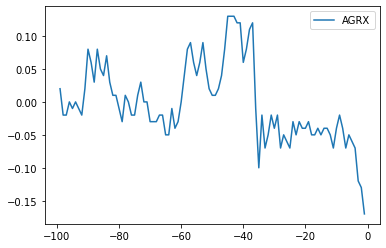

In [56]:
agrxTest.plot(kind='line')

<AxesSubplot:>

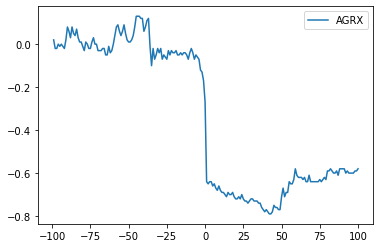

In [54]:
alpha_2([252],['AGRX']).plot(kind='line')

Above is just validation of the new alpha function. 

In [63]:
symbols = data['Ticker'].to_list()
days = data['Day'].to_list()
inputs = list(zip(days,symbols))

In [66]:
alphas = alpha_3(days,symbols) # finds alpha for all events in dataset, output is pandas dataframe 

In [69]:
alphas.tail()

,AGRX,AEZS,HALO,GNCA,OTIC,CHRS,GSK,FGEN,NBIX,ABBV,...,BLRX,ARQT,BLPH,RHHBY,VTRS,ALNY,UROV,LQDA,RVNC,YMAB
-5,-0.06,0.15,0.01,-0.10,-0.02,-0.02,-0.11,0.22,-0.21,-0.06,...,0.23,-0.52,-0.36,-0.06,-0.07,-0.28,0.52,-0.64,-0.11,-0.01
-4,-0.07,0.02,0.02,-0.12,-0.01,-0.03,-0.10,0.21,-0.22,-0.07,...,0.23,-0.55,-0.38,-0.08,-0.04,-0.29,0.55,-0.64,-0.13,-0.07
-3,-0.12,0.04,0.02,-0.13,0.01,-0.07,-0.11,0.26,-0.22,-0.06,...,0.22,-0.52,-0.38,-0.07,-0.04,-0.30,0.55,-0.68,-0.15,-0.12
-2,-0.13,0.05,0.02,-0.10,-0.01,-0.08,-0.12,0.28,-0.21,-0.05,...,0.29,-0.51,-0.35,-0.08,0.08,-0.31,0.54,-0.69,-0.18,-0.09
-1,-0.17,0.02,0.05,-0.10,-0.01,-0.12,-0.12,0.31,-0.22,-0.06,...,0.47,-0.47,-0.36,-0.08,0.01,-0.32,0.54,-0.68,-0.18,-0.02


In [76]:
totalAlpha = alphas.iloc[-1].to_list() # last row in dataframe 

In [77]:
data['100dPreAlpha'] = totalAlpha

In [78]:
data

,Ticker,Drug,Indication,Date,Status,Class,Day,100dPreAlpha
0,AGRX,Twirla,Contraceptive patch,2017-01-03,Phase3,neg,252,-0.17
1,AEZS,Macimorelin Acetate - Macrilen,Adult Growth Deficiency,2017-01-04,Phase3,neg,253,0.02
2,HALO,HALO-301,Pancreatic cancer,2017-01-05,Phase2,pos,254,0.05
3,GNCA,GEN-003,Genital herpes,2017-01-05,Phase2b,na,254,-0.10
4,OTIC,OTIPRIO,Acute otitis externa,2017-01-05,Phase3,na,254,-0.01
...,...,...,...,...,...,...,...,...
2391,ALNY,Lumasiran,Primary Hyperoxaluria Type 1 (PH1),2020-11-24,Approved,na,1233,-0.32
2392,UROV,Vibegron,Irritable bowel syndrome (IBS),2020-11-24,Phase2a,na,1233,0.54
2393,LQDA,LIQ861,Pulmonary arterial hypertension,2020-11-25,CRL,na,1234,-0.68
2394,RVNC,DAXI (RT002),Moderate to severe glabellar (frown) lines,2020-11-25,PDUFA,na,1234,-0.18


In [79]:
data['RunUp'] = np.where(data['100dPreAlpha'] > 0.3,1,0) # if 100 day pre event alpha is greater than 0.3, then RunUp = 1 

In [80]:
data

,Ticker,Drug,Indication,Date,Status,Class,Day,100dPreAlpha,RunUp
0,AGRX,Twirla,Contraceptive patch,2017-01-03,Phase3,neg,252,-0.17,0
1,AEZS,Macimorelin Acetate - Macrilen,Adult Growth Deficiency,2017-01-04,Phase3,neg,253,0.02,0
2,HALO,HALO-301,Pancreatic cancer,2017-01-05,Phase2,pos,254,0.05,0
3,GNCA,GEN-003,Genital herpes,2017-01-05,Phase2b,na,254,-0.10,0
4,OTIC,OTIPRIO,Acute otitis externa,2017-01-05,Phase3,na,254,-0.01,0
...,...,...,...,...,...,...,...,...,...
2391,ALNY,Lumasiran,Primary Hyperoxaluria Type 1 (PH1),2020-11-24,Approved,na,1233,-0.32,0
2392,UROV,Vibegron,Irritable bowel syndrome (IBS),2020-11-24,Phase2a,na,1233,0.54,1
2393,LQDA,LIQ861,Pulmonary arterial hypertension,2020-11-25,CRL,na,1234,-0.68,0
2394,RVNC,DAXI (RT002),Moderate to severe glabellar (frown) lines,2020-11-25,PDUFA,na,1234,-0.18,0


In [81]:
data['RunUp'].value_counts() # looking at the occurence of run up events in the dataset

0    2068
1     328
Name: RunUp, dtype: int64

In [82]:
data['Volat'] = np.where((data['Class'] == 'pos') | (data['Class'] == 'neg'),1,0) # creating 'Volat' (Volatile) column based on Class column which is ultimate direction of event outcome

In [83]:
data

,Ticker,Drug,Indication,Date,Status,Class,Day,100dPreAlpha,RunUp,Volat
0,AGRX,Twirla,Contraceptive patch,2017-01-03,Phase3,neg,252,-0.17,0,1
1,AEZS,Macimorelin Acetate - Macrilen,Adult Growth Deficiency,2017-01-04,Phase3,neg,253,0.02,0,1
2,HALO,HALO-301,Pancreatic cancer,2017-01-05,Phase2,pos,254,0.05,0,1
3,GNCA,GEN-003,Genital herpes,2017-01-05,Phase2b,na,254,-0.10,0,0
4,OTIC,OTIPRIO,Acute otitis externa,2017-01-05,Phase3,na,254,-0.01,0,0
...,...,...,...,...,...,...,...,...,...,...
2391,ALNY,Lumasiran,Primary Hyperoxaluria Type 1 (PH1),2020-11-24,Approved,na,1233,-0.32,0,0
2392,UROV,Vibegron,Irritable bowel syndrome (IBS),2020-11-24,Phase2a,na,1233,0.54,1,0
2393,LQDA,LIQ861,Pulmonary arterial hypertension,2020-11-25,CRL,na,1234,-0.68,0,0
2394,RVNC,DAXI (RT002),Moderate to severe glabellar (frown) lines,2020-11-25,PDUFA,na,1234,-0.18,0,0


In [84]:
sns.set_theme()

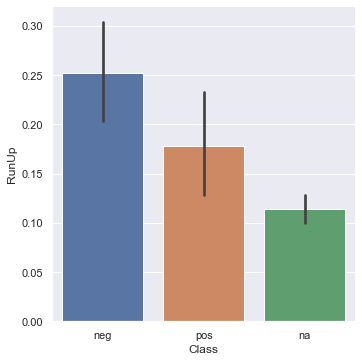

In [85]:
sns.catplot(data=data,kind='bar',x='Class',y='RunUp')

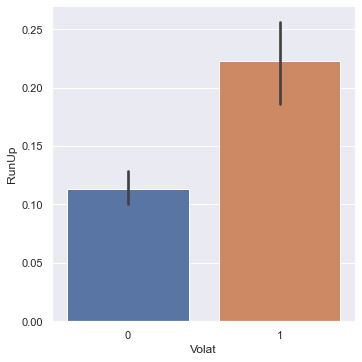

In [210]:
sns.catplot(data=data,kind='bar',x='Volat',y='RunUp')

The chart above shows the occurence of runUps before an event when each event is classified based on ultimate outcome. It appears that Run-Ups tend toward negative event outcomes. The second chart demonstrates that a stock 'Running Up' before an event is actually predictive of volatility. 

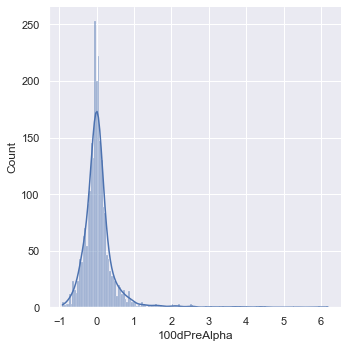

In [243]:
sns.displot(data=data,x='100dPreAlpha',kde=True)

In [245]:
data['100dPreAlpha'].mean().round(decimals=3) # mean

0.062

The above mean and graph show the distribution of 100dPreAlpha for the whole dataset. Note, the mean is low at 0.062, run ups were defined as events that had greater than 0.30 alpha generation in this 100 day period.  

In [252]:
mktCapdata = pd.read_csv('catalystsMktCap.csv')

In [253]:
mktCapdata.head()

,Unnamed: 0,Ticker,Drug,Indication,Date,Status,Day,Class,Volat,marketCap
0,0,AGRX,Twirla,Contraceptive patch,2017-01-03,Phase3,42,neg,1,254.435
1,1,AEZS,Macimorelin Acetate - Macrilen,Adult Growth Deficiency,2017-01-04,Phase3,43,neg,1,24.097
2,2,HALO,HALO-301,Pancreatic cancer,2017-01-05,Phase2,44,pos,1,5549.262
3,3,GNCA,GEN-003,Genital herpes,2017-01-05,Phase2b,44,na,0,112.565
4,4,OTIC,OTIPRIO,Acute otitis externa,2017-01-05,Phase3,44,na,0,261.394


In [254]:
data.shape

(2396, 10)

In [255]:
mktCapdata.shape

(2396, 10)

They are the same length.  

In [257]:
data['mktCap'] = mktCapdata['marketCap']

In [258]:
data.head()

,Ticker,Drug,Indication,Date,Status,Class,Day,100dPreAlpha,RunUp,Volat,mktCap
0,AGRX,Twirla,Contraceptive patch,2017-01-03,Phase3,neg,252,-0.17,0,1,254.435
1,AEZS,Macimorelin Acetate - Macrilen,Adult Growth Deficiency,2017-01-04,Phase3,neg,253,0.02,0,1,24.097
2,HALO,HALO-301,Pancreatic cancer,2017-01-05,Phase2,pos,254,0.05,0,1,5549.262
3,GNCA,GEN-003,Genital herpes,2017-01-05,Phase2b,na,254,-0.10,0,0,112.565
4,OTIC,OTIPRIO,Acute otitis externa,2017-01-05,Phase3,na,254,-0.01,0,0,261.394


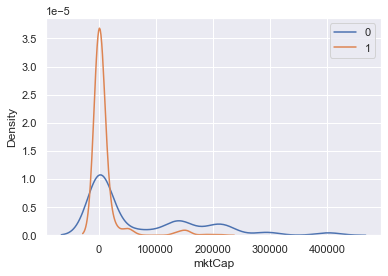

In [260]:
for i in data['RunUp'].unique():
    sns.distplot(data[data['RunUp']==i]['mktCap'],hist=False,label=i)
    plt.legend()

In [263]:
data.loc[data['RunUp'] == 1]['mktCap'].mean().round(decimals=3)

9606.784

In [264]:
data.loc[data['RunUp'] == 0]['mktCap'].mean().round(decimals=3)

72288.56

In [265]:
pipelineCount = pd.read_csv('catalystDrugCount.csv')

In [266]:
pipelineCount.shape

(1679, 10)

In [267]:
pipelineCount.head()

,Unnamed: 0,Ticker,Date,Day,Volat,marketCap,p1,p2,p3,drugCount
0,0,AGRX,2017-01-03,42,1,254.435,0,0,1,1
1,1,AEZS,2017-01-04,43,1,24.097,0,0,1,3
2,2,HALO,2017-01-05,44,1,5549.262,0,1,0,10
3,3,GNCA,2017-01-05,44,0,112.565,0,1,0,3
4,4,OTIC,2017-01-05,44,0,261.394,0,0,1,6


In [283]:
pipelineCountDict = pipelineCount[['Ticker','drugCount']].set_index('Ticker').to_dict()

In [289]:
z = 'AGRX'

pipelineCountDict['drugCount'][z]

1

In [290]:
res = []
for name in data['Ticker'].to_list():
    try:
        res.append(pipelineCountDict['drugCount'][name])
    except:
        res.append(np.nan)

In [292]:
len(res) == len(data['Ticker'])

True

In [293]:
data['drugCount'] = res

In [294]:
data.head()

,Ticker,Drug,Indication,Date,Status,Class,Day,100dPreAlpha,RunUp,Volat,mktCap,drugCount
0,AGRX,Twirla,Contraceptive patch,2017-01-03,Phase3,neg,252,-0.17,0,1,254.435,1.0
1,AEZS,Macimorelin Acetate - Macrilen,Adult Growth Deficiency,2017-01-04,Phase3,neg,253,0.02,0,1,24.097,3.0
2,HALO,HALO-301,Pancreatic cancer,2017-01-05,Phase2,pos,254,0.05,0,1,5549.262,10.0
3,GNCA,GEN-003,Genital herpes,2017-01-05,Phase2b,na,254,-0.10,0,0,112.565,3.0
4,OTIC,OTIPRIO,Acute otitis externa,2017-01-05,Phase3,na,254,-0.01,0,0,261.394,6.0


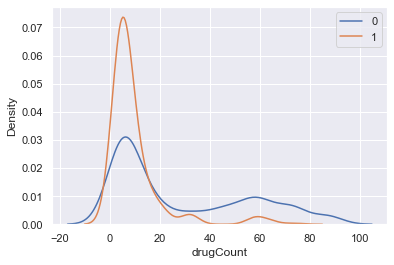

In [295]:
for i in data['RunUp'].unique():
    sns.distplot(data[data['RunUp']==i]['drugCount'],hist=False,label=i)
    plt.legend()

Both market cap and drugCount show similar patterns when compared to density of RunUp events. This relationship is similar to the correllation they have with volatile events. 

In [197]:
# global params, proof of concept
eventDate = 252
testDelta = 100
ticker = 'AGRX'

# range of days 
testRange = [a for a in range(-testDelta,0)]

cache = -1000 # arbitrary
for outer in testRange:
    for inner in testRange:
        if inner - outer > 5:
            alpha = alpha5(outer+eventDate,inner+eventDate,ticker)
            if alpha > cache:
                cache = alpha
                outerCache = outer
                innerCache = inner

In [198]:
print(cache,outerCache,innerCache)

0.179 -64 -43


Above is just proof of concept. The event and ticker are arbitrary, event is not in the run ups subset. Just selected because it was the first one in the dataset. 

In [203]:
runUpTickers = data.loc[data['RunUp'] == 1]['Ticker'].to_list()
runUpDays = data.loc[data['RunUp'] == 1]['Day'].to_list()

In [205]:
runUpAlpha = alpha_3(runUpDays,runUpTickers)

In [206]:
runUpAlphaMean = runUpAlpha.mean(axis=1)

<AxesSubplot:>

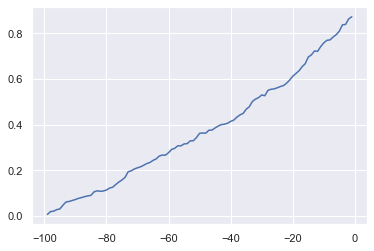

In [208]:
runUpAlphaMean.plot(kind='line')

This is oddly linear but I digress, this subset ('runUp') is correctly sorting for the runUp type of trading pattern going into a catalyst event. This is indicated by the increase in alpha generation leading up to the event. It would be a problem if this increase was focused around one area or period of time, this is not the case.  

In [212]:
runUps = data.loc[data['RunUp'] == 1]
runUps.head()

,Ticker,Drug,Indication,Date,Status,Class,Day,100dPreAlpha,RunUp,Volat
7,FGEN,Pamrevlumab (LAPIS),Pancreatic cancer,2017-01-17,Phase2,na,261,0.31,1,0
22,ZSAN,M207,Migraine,2017-02-13,Phase3,pos,280,0.63,1,1
41,IONS,Volanesorsen - APPROACH,Familial chylomicronemia syndrome (FCS),2017-03-06,Phase3,na,294,0.50,1,0
42,KURA,Tipifarnib - (AIM-HN/SEQ-HN),Head and neck squamous cell carcinomas (HNSCC),2017-03-06,Phase2,pos,294,0.68,1,1
60,PRTK,Sarecycline,Severe acne vulgaris,2017-03-27,Phase3,na,309,0.32,1,0


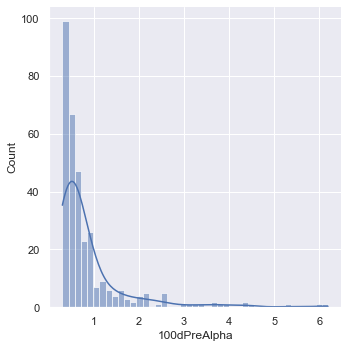

In [215]:
sns.displot(data=runUps,x='100dPreAlpha',kde=True)

This is a graph of the 100 day pre event alpha generation associated with 'runUp' events, this is regarless of ultimate event outcome. 

In [217]:
runUps['100dPreAlpha'].mean().round(decimals=3)

0.873

Above is the mean alpha associated with an event of this kind. 

In [221]:
runUpsZip = list(zip(runUpDays,runUpTickers)) # zip of the input data 

alphaRes = []
day1Res = []
day2Res = []

testDelta = 100

for eventDate,ticker in runUpsZip:
    # range of days 
    testRange = [a for a in range(-testDelta,0)]

    cache = -1000 # arbitrary
    for outer in testRange:
        for inner in testRange:
            if inner - outer > 5:
                alpha = alpha5(outer+eventDate,inner+eventDate,ticker)
                if alpha > cache:
                    cache = alpha
                    outerCache = outer
                    innerCache = inner

    alphaRes.append(cache)
    day1Res.append(outerCache)
    day2Res.append(innerCache)

The code block above took approximately 6 hours to complete. The total possible combinations were decreased by forcing inner (day when trade is closed) to be 5 days greater than outer (day when trade is opened). The 5 day period was chosen as a realistic minimal holding period, a period less than that would not be really possible unless trading in very small amounts. This trading period could be increased to 10-20 days to make a larger window of analysis possible. 

In [222]:
len(runUpsZip)

328

In [223]:
len(alphaRes)

328

In [225]:
runUps.head()

,Ticker,Drug,Indication,Date,Status,Class,Day,100dPreAlpha,RunUp,Volat
7,FGEN,Pamrevlumab (LAPIS),Pancreatic cancer,2017-01-17,Phase2,na,261,0.31,1,0
22,ZSAN,M207,Migraine,2017-02-13,Phase3,pos,280,0.63,1,1
41,IONS,Volanesorsen - APPROACH,Familial chylomicronemia syndrome (FCS),2017-03-06,Phase3,na,294,0.50,1,0
42,KURA,Tipifarnib - (AIM-HN/SEQ-HN),Head and neck squamous cell carcinomas (HNSCC),2017-03-06,Phase2,pos,294,0.68,1,1
60,PRTK,Sarecycline,Severe acne vulgaris,2017-03-27,Phase3,na,309,0.32,1,0


In [226]:
runUps['maxAlphaPeriod'] = alphaRes
runUps['day1maxAlpha'] = day1Res
runUps['day2maxAlpha'] = day2Res

In [227]:
runUps.head()

,Ticker,Drug,Indication,Date,Status,Class,Day,100dPreAlpha,RunUp,Volat,maxAlphaPeriod,day1maxAlpha,day2maxAlpha
7,FGEN,Pamrevlumab (LAPIS),Pancreatic cancer,2017-01-17,Phase2,na,261,0.31,1,0,0.418,-46,-1
22,ZSAN,M207,Migraine,2017-02-13,Phase3,pos,280,0.63,1,1,1.737,-67,-20
41,IONS,Volanesorsen - APPROACH,Familial chylomicronemia syndrome (FCS),2017-03-06,Phase3,na,294,0.50,1,0,1.078,-87,-45
42,KURA,Tipifarnib - (AIM-HN/SEQ-HN),Head and neck squamous cell carcinomas (HNSCC),2017-03-06,Phase2,pos,294,0.68,1,1,1.068,-85,-2
60,PRTK,Sarecycline,Severe acne vulgaris,2017-03-27,Phase3,na,309,0.32,1,0,0.464,-99,-56


In [228]:
runUps.to_csv('runUpAnalysis.csv')

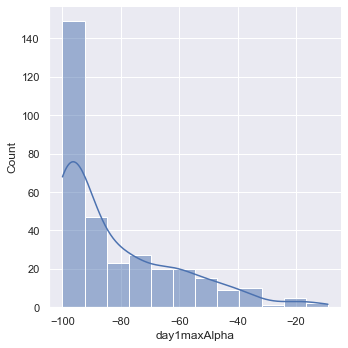

In [229]:
sns.displot(data=runUps,x='day1maxAlpha',kde=True)

There is a lot of density close to the -100 day bound. This indicates that a new dataset with a larger window might be useful. 

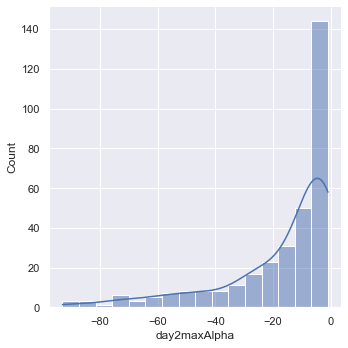

In [230]:
sns.displot(data=runUps,x='day2maxAlpha',kde=True)

In [246]:
runUps['day1maxAlpha'].mean().round(decimals=0)

-82.0

In [247]:
runUps['day2maxAlpha'].mean().round(decimals=0)

-17.0

The data above demonstrates the optimal time frame to trade a stock where a run up is likely to occur. The graphs demonstrate the distribution of day1 and day2 relative to event date. The means above show the optimal time to initiate (day1maxAlpha) and time to exit (day2maxAlpha) for the 100 day time period before the event. 

In [238]:
len(runUps.loc[(runUps['day1maxAlpha'] == -99) & (runUps['day2maxAlpha'] == -1)])

5

Above was a test to see how many data points suggest a strategy of 'buy as soon as possible' and 'sell as late as possible'. It is not very many out of the whole dataset. 

In [240]:
len(runUps.loc[runUps['day1maxAlpha'] == -99])

28

There were 28 data points where the day1maxAlpha value was equal to the lowest value possible, this suggests that a longer range may be needed. The ideal data would have the highest data density somewhere near the middle, not one side. Having the density focused on one side, especially the lower side, suggests that a larger window might be useful. 

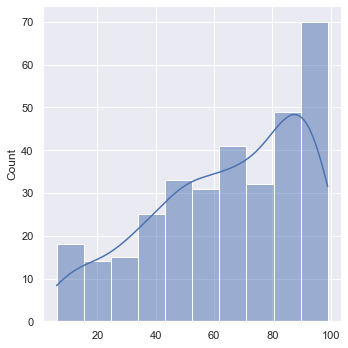

In [300]:
deltaDays = runUps['day1maxAlpha'].abs() - runUps['day2maxAlpha'].abs()
sns.displot(data=deltaDays,kde=True)

In [302]:
deltaDays.mean().round(decimals=0)

64.0

The above graph and mean show the delta between day 1 and day 2 for maximizing alpha. The mean is a 64 day difference between the dates. 

In [242]:
delta = 100
testRange2 = [a for a in range(-delta,0)]

count = 0
for outer in testRange2:
    for inner in testRange2:
        if inner - outer > 5:
                count += 1

print('total possible: ',count)

total possible:  4465


This is the total possible combinations of the days based on the params I inputed. 

In [168]:
%%timeit
aRange = [a for a in range(0,5)]

stored = -1000
for outer in aRange:
    for inner in aRange:
        if outer < inner:
            product = outer * inner
            if product > stored:
                stored = product
                outerStored = outer
                innerStored = inner

1.28 µs ± 5.44 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [167]:
%%timeit
aRange = [a for a in range(0,5)]

products = []
outers = []
inners = []

for outer in aRange:
    for inner in aRange:
        if outer < inner:
            products.append(outer*inner)
            outers.append(outer)
            inners.append(inner)

maxProduct = max(products)

for i in range(0,len(products)):
    if products[i] == maxProduct:
        maxIndex = i

2.95 µs ± 36.4 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


The first method is faster. 

In [181]:
def alpha5(day1,day2,aticker):
    """ the goal of this function is to calculate the alpha beteen the two given days for the specified ticker """
    # major difference is that this function is only meant to handle one ticker not a list of them, it also work along a specified range 
    index = 'XBI'
    df = priceData

    daysRange = [a for a in range(day1,day2)]

    stock_array = np.zeros((len(daysRange),1))
    for day in daysRange:
        stock_array[day-day1] = df.loc[df['Day']==day,aticker].item()

    index_array = np.zeros((len(daysRange),1))
    for day in daysRange:
        index_array[day-day1] = df.loc[df['Day']==day,index].item()

    beta = np.array(betasXBI[aticker])

     # adj the cumulative exp returns with beta by multiplication
    index_shape = index_array.shape[0] -1 #finds the shape for use in pct change
    cum_index =np.cumprod((np.diff(index_array,axis=0) / index_array[:index_shape,:] +1),axis=0)-1 #cum prod of the pct change is equal to cum change and thus cum return
    w_beta = np.multiply(cum_index,beta) #multiplies the beta for each tickers and corresponding column by the column of expected returns for the index 

    # calculate alpha
    stock_shape = stock_array.shape[0]-1
    cum_stock=np.cumprod((np.diff(stock_array,axis=0) / stock_array[:stock_shape,:] +1),axis=0)-1 #this is the same method in the last step just for the array of tickers
    
    alpha = cum_stock - w_beta #subtracts the cum_stock array from the expected return, this is actual return - expected return 
    
    return alpha[-1].round(decimals=3).item()

In [182]:
alpha5(120,400,'AGRX') # just some testing

-0.84

In [183]:
alpha5(120,160,'AGRX') # more testing

-0.184

In [119]:
day1 = 120
day2 = 160
days_range = [a for a in range(day1,day2)]

stock_array = np.zeros((len(days_range),1))
for day in days_range:
    stock_array[day-120] = priceData.loc[priceData['Day']==day,'AGRX'].item() # proof of concept

In [241]:
stock_array

array([[7.56],
       [7.04],
       [7.41],
       [7.61],
       [7.61],
       [7.66],
       [7.48],
       [7.25],
       [7.24],
       [7.48],
       [7.55],
       [7.27],
       [7.1 ],
       [6.96],
       [7.01],
       [6.78],
       [6.58],
       [6.8 ],
       [6.66],
       [6.86],
       [6.73],
       [6.67],
       [6.99],
       [6.78],
       [7.  ],
       [7.33],
       [7.07],
       [7.05],
       [6.95],
       [7.01],
       [7.36],
       [7.  ],
       [6.99],
       [7.19],
       [6.93],
       [6.99],
       [7.05],
       [6.96],
       [7.07],
       [7.  ]])

In [86]:
def alpha_4(aday1,aday2, aticker): # just looks at alpha before the event, MUST BE ITEMS NOT IN LIST
    """ This function calculates the alpha generated around an event for a list of days and tickers """
    #these values can be added into the input line of the function for greater modulatity
    days = [aday]
    tickers = [aticker]

    index = 'XBI' # these values can be written as inputs in the function but are hardcoded here for ease of use. 
    number = 100# this is the number of days pre/post day 0 that the alpha is generated for
    df = priceData # this is where the function searches for the tickers and price data 
    
    no_index = [a for a in tickers if a != index]
    days_range = [a for a in range(-number,0)]
    
    #this is the function for return for each tickers for each specific day period +/- the number
    stock_array = np.zeros((len(days_range),len(no_index))) #creates empty array based on the size of tickers and days
    for a in range(len(no_index)): #outer loop that runs along x axis and corresponds to the tickers
        for day in days_range: #inner loop that runs along the y axis and corresponds to the days
            stock_array[day+number,a] = df.loc[df['Day']==days[a]+day,no_index[a]].item()
    
    # this is the function for return of the index for each specific day period 
    index_array = np.zeros((len(days_range),len(no_index))) #this data is structured the same way as the previous code so see that
    for a in range(len(no_index)):
        for day in days_range:
            index_array[day+number,a] = df.loc[df['Day']==days[a]+day,index].item()
            
    # calculating beta -- this is mostly done in pandas for ease of the series and dataframes with tickers
    daily = df.pct_change().drop(['Day'],axis=1) #this drops the day column that is used as another index
    beta = pd.Series({symbol: (daily[index].cov(daily[symbol]) / daily[index].var()).round(decimals=2) 
               for symbol in daily 
               if symbol != index}) #divides the covariance of the index and each symbol by the variance of the index, this generates beta, beta is stored as pd.series 
                                    #for each unique ticker over the entire period that price data exists in the dataframe. 
    
    beta_df = pd.DataFrame({'Ticker':beta.index,'Beta':beta.values}) #create dataframe containing the beta for the unique tickers, tickers as index, beta as col1. 
    beta_list = [beta_df.loc[beta_df['Ticker'] == no_index[a],'Beta'].item() for a in range(len(no_index))] #search for the beta associated with each ticker in no_index
    beta_array = np.array(beta_list) #this creates a numpy array that is compatible with multiplication by the other numpy arrays 
    
    # adj the cumulative exp returns with beta by multiplication
    index_shape = index_array.shape[0] -1 #finds the shape for use in pct change
    cum_index =np.cumprod((np.diff(index_array,axis=0) / index_array[:index_shape,:] +1),axis=0)-1 #cum prod of the pct change is equal to cum change and thus cum return
    w_beta = np.multiply(cum_index,beta_array) #multiplies the beta for each tickers and corresponding column by the column of expected returns for the index 

    # calculate alpha
    stock_shape = stock_array.shape[0]-1
    cum_stock=np.cumprod((np.diff(stock_array,axis=0) / stock_array[:stock_shape,:] +1),axis=0)-1 #this is the same method in the last step just for the array of tickers
    
    alpha = cum_stock - w_beta #subtracts the cum_stock array from the expected return, this is actual return - expected return 
    
    df_res = pd.DataFrame(np.round(alpha,2),index=[a for a in range(-(number-1),0)],columns=no_index) #this creates a dataframe to store everything in because its prettier
    
    return df_res #note that the first row of the specified negative range of the number is not included as we are using pct change, this is removed from index for df_res

In [49]:
def alpha_3(days, tickers): # just looks at alpha before the event
    """ This function calculates the alpha generated around an event for a list of days and tickers """
    #these values can be added into the input line of the function for greater modulatity
    
    index = 'XBI' # these values can be written as inputs in the function but are hardcoded here for ease of use. 
    number = 100# this is the number of days pre/post day 0 that the alpha is generated for
    df = priceData # this is where the function searches for the tickers and price data 
    
    no_index = [a for a in tickers if a != index]
    days_range = [a for a in range(-number,0)]
    
    #this is the function for return for each tickers for each specific day period +/- the number
    stock_array = np.zeros((len(days_range),len(no_index))) #creates empty array based on the size of tickers and days
    for a in range(len(no_index)): #outer loop that runs along x axis and corresponds to the tickers
        for day in days_range: #inner loop that runs along the y axis and corresponds to the days
            stock_array[day+number,a] = df.loc[df['Day']==days[a]+day,no_index[a]].item()
    
    # this is the function for return of the index for each specific day period 
    index_array = np.zeros((len(days_range),len(no_index))) #this data is structured the same way as the previous code so see that
    for a in range(len(no_index)):
        for day in days_range:
            index_array[day+number,a] = df.loc[df['Day']==days[a]+day,index].item()
            
    # calculating beta -- this is mostly done in pandas for ease of the series and dataframes with tickers
    daily = df.pct_change().drop(['Day'],axis=1) #this drops the day column that is used as another index
    beta = pd.Series({symbol: (daily[index].cov(daily[symbol]) / daily[index].var()).round(decimals=2) 
               for symbol in daily 
               if symbol != index}) #divides the covariance of the index and each symbol by the variance of the index, this generates beta, beta is stored as pd.series 
                                    #for each unique ticker over the entire period that price data exists in the dataframe. 
    
    beta_df = pd.DataFrame({'Ticker':beta.index,'Beta':beta.values}) #create dataframe containing the beta for the unique tickers, tickers as index, beta as col1. 
    beta_list = [beta_df.loc[beta_df['Ticker'] == no_index[a],'Beta'].item() for a in range(len(no_index))] #search for the beta associated with each ticker in no_index
    beta_array = np.array(beta_list) #this creates a numpy array that is compatible with multiplication by the other numpy arrays 
    
    # adj the cumulative exp returns with beta by multiplication
    index_shape = index_array.shape[0] -1 #finds the shape for use in pct change
    cum_index =np.cumprod((np.diff(index_array,axis=0) / index_array[:index_shape,:] +1),axis=0)-1 #cum prod of the pct change is equal to cum change and thus cum return
    w_beta = np.multiply(cum_index,beta_array) #multiplies the beta for each tickers and corresponding column by the column of expected returns for the index 

    # calculate alpha
    stock_shape = stock_array.shape[0]-1
    cum_stock=np.cumprod((np.diff(stock_array,axis=0) / stock_array[:stock_shape,:] +1),axis=0)-1 #this is the same method in the last step just for the array of tickers
    
    alpha = cum_stock - w_beta #subtracts the cum_stock array from the expected return, this is actual return - expected return 
    
    df_res = pd.DataFrame(np.round(alpha,2),index=[a for a in range(-(number-1),0)],columns=no_index) #this creates a dataframe to store everything in because its prettier
    
    return df_res #note that the first row of the specified negative range of the number is not included as we are using pct change, this is removed from index for df_res

In [53]:
def alpha_2(days, tickers):
    """ This function calculates the alpha generated around an event for a list of days and tickers """
    #these values can be added into the input line of the function for greater modulatity
    
    index = 'XBI' # these values can be written as inputs in the function but are hardcoded here for ease of use. 
    number = 100# this is the number of days pre/post day 0 that the alpha is generated for
    df = priceData # this is where the function searches for the tickers and price data 
    
    no_index = [a for a in tickers if a != index]
    days_range = [a for a in range(-number,number+1)]
    
    #this is the function for return for each tickers for each specific day period +/- the number
    stock_array = np.zeros((len(days_range),len(no_index))) #creates empty array based on the size of tickers and days
    for a in range(len(no_index)): #outer loop that runs along x axis and corresponds to the tickers
        for day in days_range: #inner loop that runs along the y axis and corresponds to the days
            stock_array[day+number,a] = df.loc[df['Day']==days[a]+day,no_index[a]].item()
    
    # this is the function for return of the index for each specific day period 
    index_array = np.zeros((len(days_range),len(no_index))) #this data is structured the same way as the previous code so see that
    for a in range(len(no_index)):
        for day in days_range:
            index_array[day+number,a] = df.loc[df['Day']==days[a]+day,index].item()
            
    # calculating beta -- this is mostly done in pandas for ease of the series and dataframes with tickers
    daily = df.pct_change().drop(['Day'],axis=1) #this drops the day column that is used as another index
    beta = pd.Series({symbol: (daily[index].cov(daily[symbol]) / daily[index].var()).round(decimals=2) 
               for symbol in daily 
               if symbol != index}) #divides the covariance of the index and each symbol by the variance of the index, this generates beta, beta is stored as pd.series 
                                    #for each unique ticker over the entire period that price data exists in the dataframe. 
    
    beta_df = pd.DataFrame({'Ticker':beta.index,'Beta':beta.values}) #create dataframe containing the beta for the unique tickers, tickers as index, beta as col1. 
    beta_list = [beta_df.loc[beta_df['Ticker'] == no_index[a],'Beta'].item() for a in range(len(no_index))] #search for the beta associated with each ticker in no_index
    beta_array = np.array(beta_list) #this creates a numpy array that is compatible with multiplication by the other numpy arrays 
    
    # adj the cumulative exp returns with beta by multiplication
    index_shape = index_array.shape[0] -1 #finds the shape for use in pct change
    cum_index =np.cumprod((np.diff(index_array,axis=0) / index_array[:index_shape,:] +1),axis=0)-1 #cum prod of the pct change is equal to cum change and thus cum return
    w_beta = np.multiply(cum_index,beta_array) #multiplies the beta for each tickers and corresponding column by the column of expected returns for the index 

    # calculate alpha
    stock_shape = stock_array.shape[0]-1
    cum_stock=np.cumprod((np.diff(stock_array,axis=0) / stock_array[:stock_shape,:] +1),axis=0)-1 #this is the same method in the last step just for the array of tickers
    
    alpha = cum_stock - w_beta #subtracts the cum_stock array from the expected return, this is actual return - expected return 
    
    df_res = pd.DataFrame(np.round(alpha,2),index=[a for a in range(-(number-1),number+1)],columns=no_index) #this creates a dataframe to store everything in because its prettier
    
    return df_res #note that the first row of the specified negative range of the number is not included as we are using pct change, this is removed from index for df_res